<a href="https://colab.research.google.com/github/vcanalesp/portafolio/blob/main/docs/projects/DataScience/05_eda/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#  Análisis Exploratorio - Iris




<img src="https://storage.googleapis.com/kaggle-datasets-images/19/19/default-backgrounds/dataset-card.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv("data/iris_contaminados.csv")
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [3]:
# cambiar valor default
df.loc[df['species'].isnull(),'species'] = 'default'

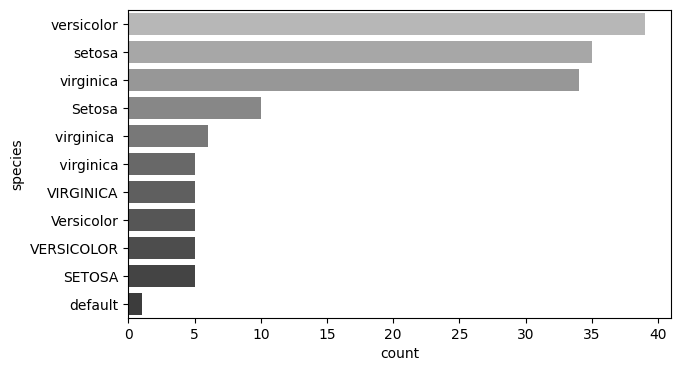

In [4]:
plt.style.use('default')
plt.figure(figsize=(7,4))

plotting = sns.countplot(
    y="species",
    data=df,
    order=df['species'].value_counts().index,
    palette="Greys_d",
    linewidth=3
)



plt.show()

In [5]:
df["species"] = df["species"].str.lower().str.strip()
df = df.loc[df['species']!="default"] 

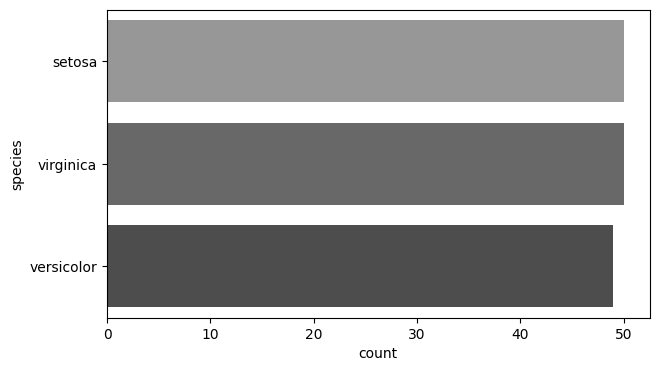

In [6]:
plt.style.use('default')
plt.figure(figsize=(7,4))

plotting = sns.countplot(
    y="species",
    data=df,
    order=df['species'].value_counts().index,
    palette="Greys_d",
    linewidth=3
)



plt.show()

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

c:\users\francisco alfaro\appdata\local\pypoetry\cache\virtualenvs\docs-rvj6uf8q-py3.8\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


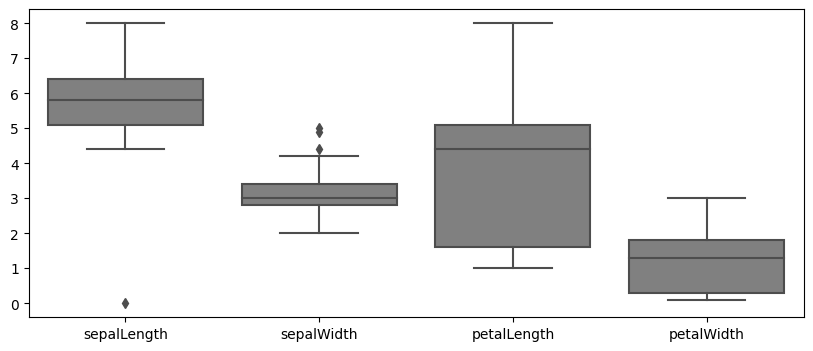

In [7]:
df.loc[df['sepalLength'].isnull(),'sepalLength'] = 0
df.loc[df['sepalLength'].isnull(),'sepalWidth'] = 0
df.loc[df['sepalLength'].isnull(),'petalLength'] = 0
df.loc[df['sepalLength'].isnull(),'petalWidth'] = 0

df_aux = df.drop(["species"],axis=1)

plt.style.use('default')
plt.figure(figsize=(10, 4))
sns.boxplot(
    data=df_aux,    
    color = "gray"
)
plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [8]:
# agregar filtro

df["label"] = "no_valido"

mask_01 = df['sepalLength'].between(4,7)
mask_02 = df['sepalWidth'].between(2,4.5)
mask_03 = df['petalLength'].between(1,7)
mask_04 = df['petalWidth'].between(0.1,2.5)

df.loc[(mask_01 & mask_02 & mask_03 & mask_04),"label"] = "valido"
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,no_valido
1,7.2,3.6,6.1,2.5,virginica,no_valido
2,6.3,3.3,6.0,2.5,virginica,valido
3,6.7,3.3,5.7,2.5,virginica,valido
4,6.3,3.4,5.6,2.4,virginica,valido


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

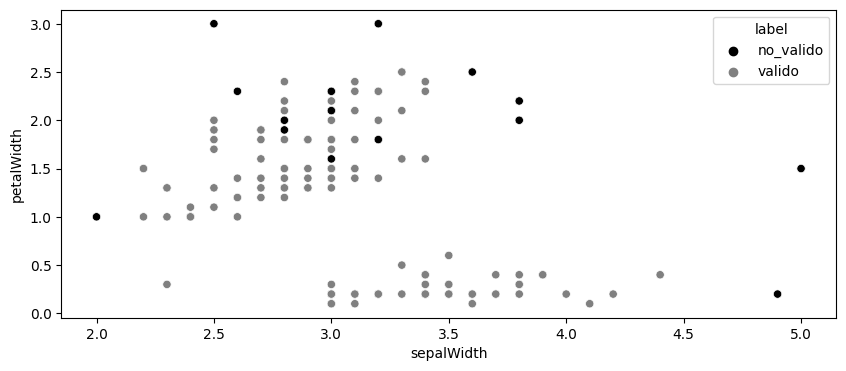

In [9]:
plt.style.use('default')
plt.figure(figsize=(10, 4))
sns.scatterplot(
        y='petalWidth',
        x='sepalWidth',
        data=df,
        hue='label',
        palette = ['black','gray']
    
)
plt.show()

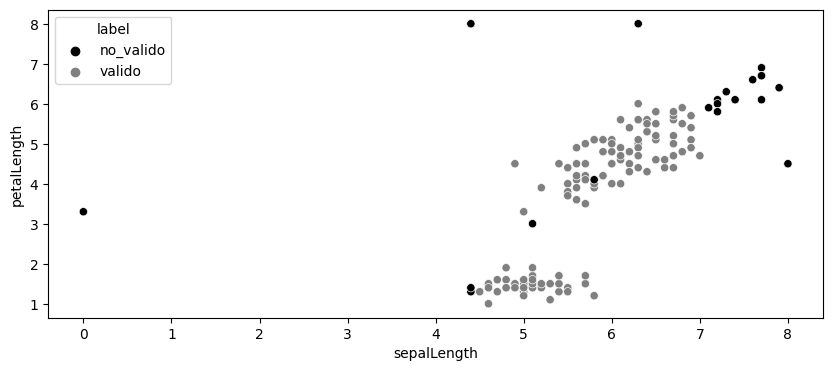

In [10]:
plt.style.use('default')
plt.figure(figsize=(10, 4))
sns.scatterplot(
        y='petalLength',
        x='sepalLength',
        data=df,
        hue='label',
        palette = ['black','gray']
    
)
plt.show()

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

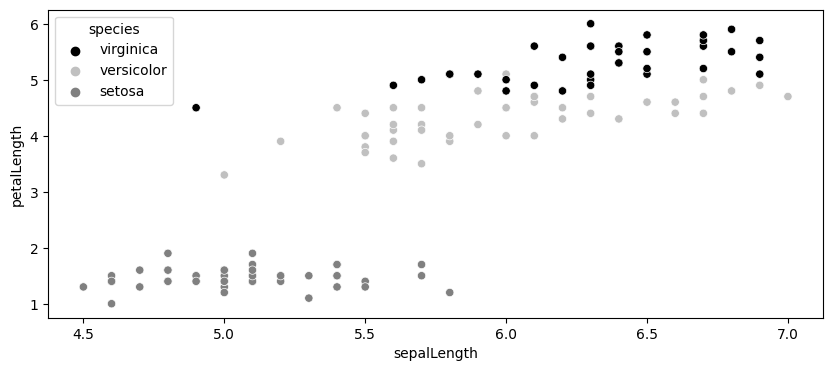

In [11]:
plt.style.use('default')
plt.figure(figsize=(10, 4))

mask = (df["label"] == "valido")
df_limpio = df[mask]
sns.scatterplot(
        y='petalLength',
        x='sepalLength',
        data=df_limpio,
        hue='species',
        palette = ['black','silver','gray',]
    
)
plt.show()